In [16]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
df = geneinfo.load_gene_file("../../")

In [5]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

This may take a minute or two ...
'ge' dictionary successfully loaded


In [6]:
term = 'reward'
tsaba.is_term(term)

True

In [7]:
%%time
tsaba.est_ns_act(term, tree_args={"n_neighbors":5})

CPU times: user 1.86 s, sys: 258 ms, total: 2.11 s
Wall time: 2.27 s


In [8]:
anal = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


t-value: -4.8252 
p-value: 1.645E-06
Effect size: -0.4542
Control/Functional Split: 760/133



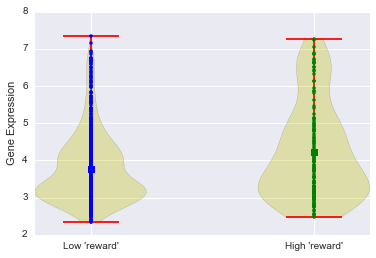

In [9]:
anal.term_ge_ttest(term, 1813, split_method='quant', graphops='violin')

In [10]:
ttest_metr = anal.term_ge_ttest_multi(term)

This may take a couple of minutes ...


In [11]:
anal.fetch_gene_descriptions(ttest_metr, csv_path="../../", nih_fetch_num=40)

Gene 100008589 not found in NIH database
Gene 353134 not found in NIH database
Gene 54874 not found in NIH database
Gene 645715 not found in NIH database
Gene 283521 not found in NIH database
Gene 574407 not found in NIH database
Gene 23089 not found in NIH database
Gene 440193 not found in NIH database
Gene 253970 not found in NIH database
Gene 140733 not found in NIH database
Gene 641311 not found in NIH database
Gene 54970 not found in NIH database
Gene 414328 not found in NIH database
Gene 85463 not found in NIH database
Gene 65065 not found in NIH database
Gene 124751 not found in NIH database
Gene 388585 not found in NIH database
Gene 138199 not found in NIH database
Gene 84152 not found in NIH database
Gene 57522 not found in NIH database

Corrected Bonferroni Alpha: 2.405E-06


135 (p = 3.530E-08; d = -0.524): [u'This gene encodes a member of the guanine nucleotide-binding protein (G protein)-coupled receptor (GPCR) superfamily, which is subdivided into classes and subtypes. Th

[(135,
  -0.52364929130621984,
  3.5297253067221851e-08,
  'adenosine A2a receptor',
  "[u'This gene encodes a member of the guanine nucleotide-binding protein (G protein)-coupled receptor (GPCR) superfamily, which is subdivided into classes and subtypes. The receptors are seven-pass transmembrane proteins that respond to extracellular cues and activate intracellular signal transduction pathways. This protein, an adenosine receptor of A2A subtype, uses adenosine as the preferred endogenous agonist and preferentially interacts with the G(s) and G(olf) family of G proteins to increase intracellular cAMP levels. It plays an important role in many biological functions, such as cardiac rhythm and circulation, cerebral and renal blood flow, immune function, pain regulation, and sleep. It has been implicated in pathophysiological conditions such as inflammatory diseases and neurodegenerative disorders. Alternative splicing results in multiple transcript variants. A read-through transcript com

Percent Significant (Bonferroni Correction; alpha = .05): 0.072 %


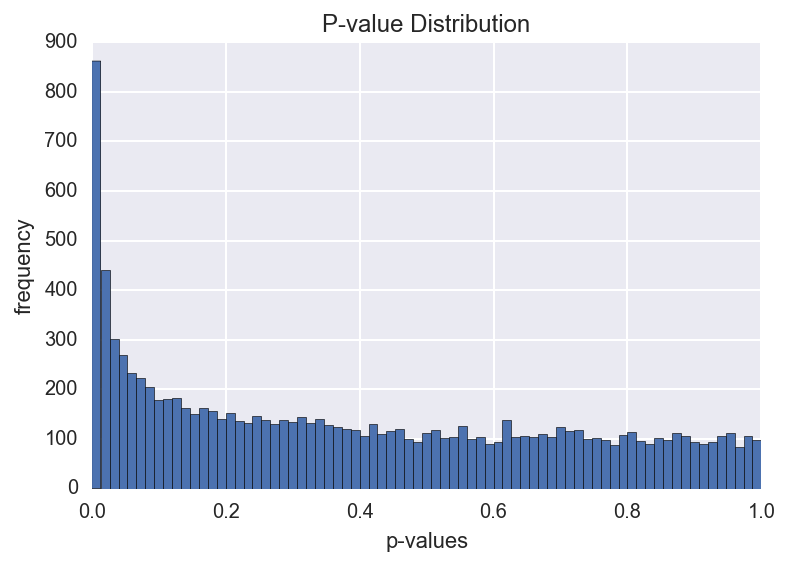

In [19]:
anal.p_val_distr(ttest_metr)

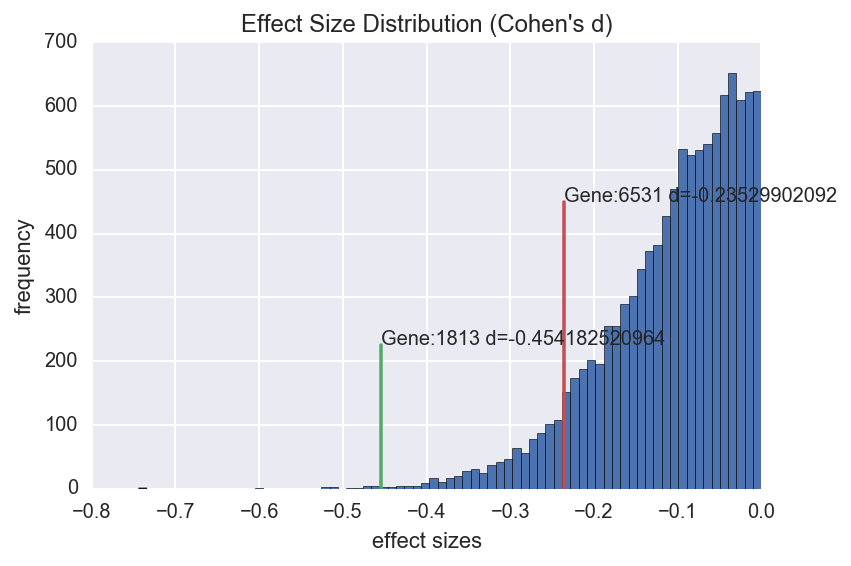

In [18]:
anal.cohen_d_distr(ttest_metr, genes_of_interest=[1813,6531])

In [14]:
r_vals = anal.term_ge_spearman_rho(term)

This may take a couple of minutes ...


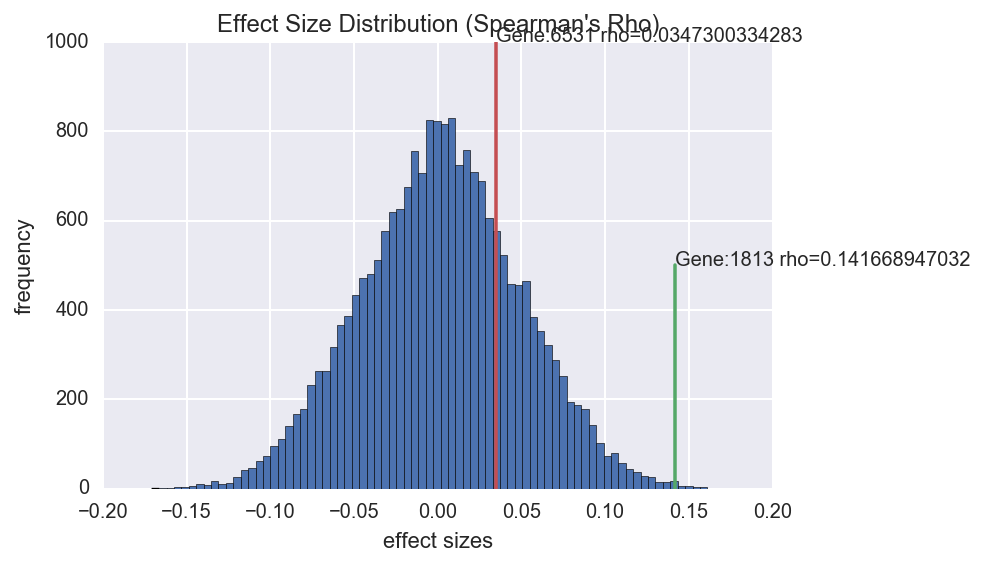

In [17]:
anal.rho_distr(r_vals, genes_of_interest=[1813,6531])

In [ ]:
anal.fetch_gene_descriptions(r_vals, coeff='spearman', csv_path="../..")